In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [65]:
df = pd.read_csv('Order_details(masked).csv')

In [3]:
df.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [72]:
df['Time'] = pd.to_datetime(df['Transaction Date'])
df['Hour'] = (df['Time']).dt.hour.astype(int)
del df['Transaction Date']

In [73]:
df.head()

,Name,Email,Product,Time,Hour
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,2021-01-03 00:47:26,0
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,2021-01-03 02:04:07,2
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,2021-01-03 09:10:43,9
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,2021-01-03 09:49:48,9
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",2021-01-03 10:56:46,10


In [74]:
df.isna().sum()

Name       0
Email      0
Product    0
Time       0
Hour       0
dtype: int64

In [75]:
df.dtypes

Name               object
Email              object
Product            object
Time       datetime64[ns]
Hour                int32
dtype: object

In [ ]:
#Общее количество покупок каждый час

In [77]:
df.groupby('Hour')['Product'].agg('count').sort_values(ascending = False)

Hour
12    51
23    51
22    45
19    42
15    41
21    41
20    39
11    37
13    33
18    33
16    29
14    28
17    27
10    24
0     17
9     14
8     10
7      6
1      4
5      3
2      3
6      2
3      1
Name: Product, dtype: int64

In [80]:
timemost = df['Hour'].value_counts() 
timemost1 = [] 

for i in range(0,23): 
	timemost1.append(i) 
	
timemost2 = timemost.sort_index() 
timemost2.tolist() 
timemost2 = pd.DataFrame(timemost2) 

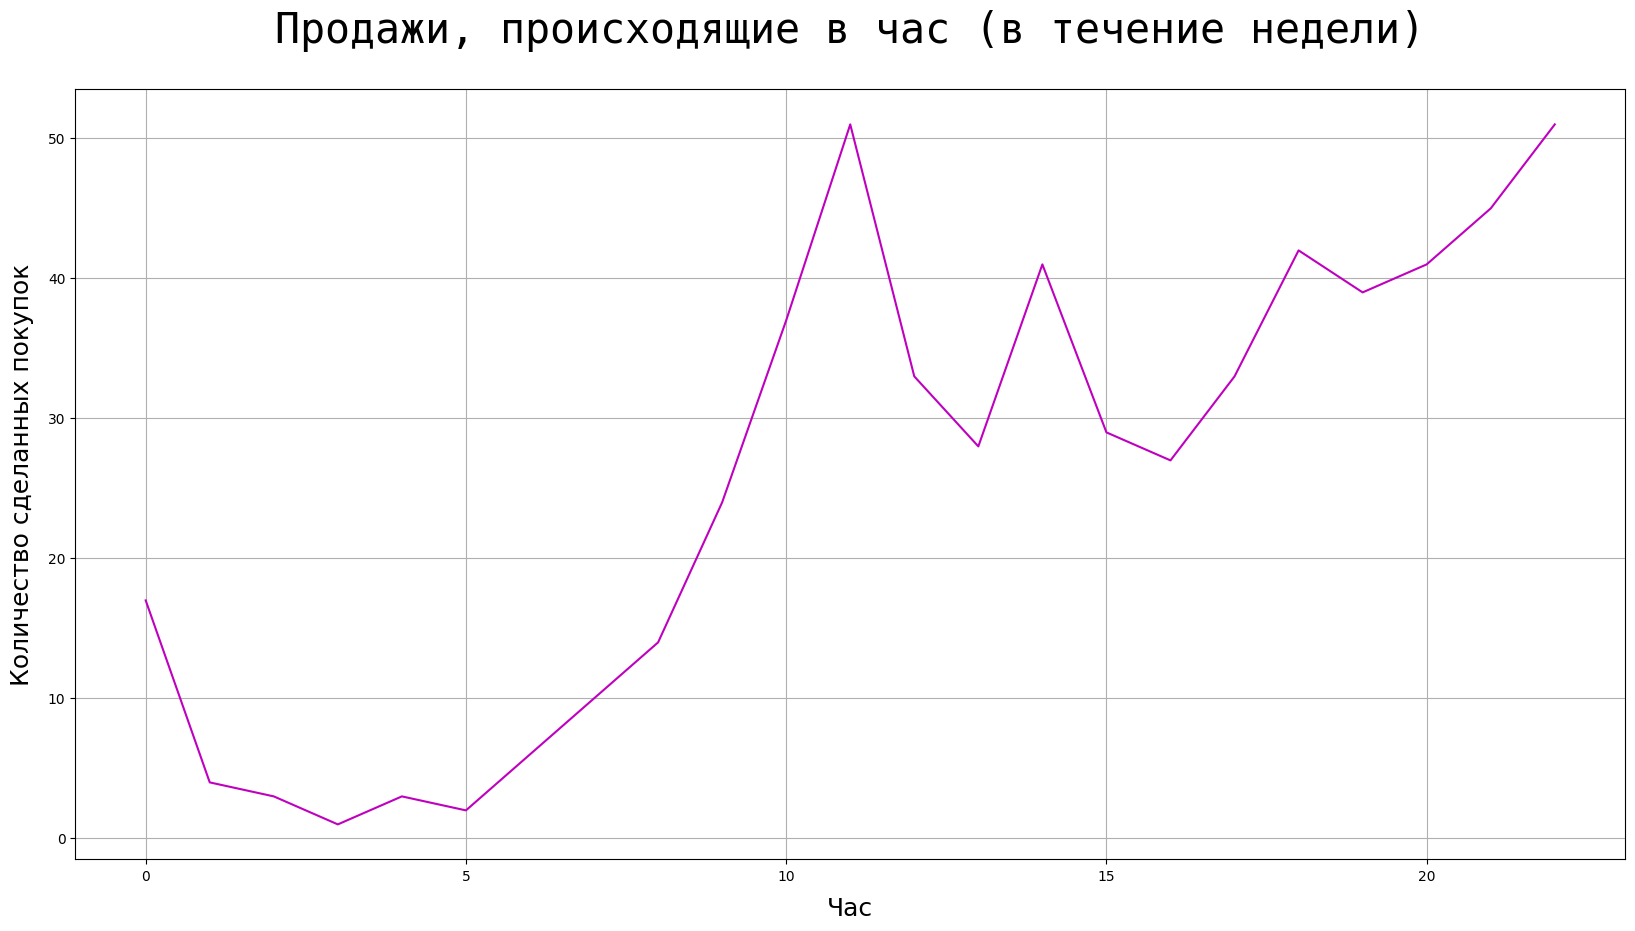

In [91]:
plt.figure(figsize=(20, 10)) 

plt.title('Продажи, происходящие в час (в течение недели)', 
		fontdict={'fontname': 'monospace', 'fontsize': 30}, y=1.05) 

plt.ylabel("Количество сделанных покупок", fontsize=18, labelpad=10) 
plt.xlabel("Час", fontsize=18, labelpad=10) 
plt.plot(timemost1, timemost2, color='m') 
plt.grid() 
plt.show() 
